In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/airlines-reviews/airlines_reviews.csv')
df

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,an uneventful flight,N Vickers,2016-06-20,Korean Air,True,"KE124, Brisbane to Incheon (A330) and KE867,...",Business,June 2016,BNE to ULN via ICN,Economy Class,5,4,5,3,4,7,yes
8096,Korean Air always impresses,Kim Holloway,2016-06-12,Korean Air,False,Our recent flight was our fourth trip to the...,Couple Leisure,June 2016,SYD to LHR via ICN,Economy Class,3,5,5,4,5,10,yes
8097,didn’t offer anything,C Clark,2016-06-06,Korean Air,True,I flew Korean Air from Bali to Seoul in Pres...,Business,April 2016,DPS to ICN,Business Class,4,5,5,5,1,2,no
8098,appreciated the service onboard,E Petan,2016-04-21,Korean Air,False,Seoul to Paris with Korean Air. I am traveli...,Business,April 2016,ICN to CDG,Business Class,5,1,3,4,5,10,yes


In [3]:
df.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [5]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8090,8091,8092,8093,8094,8095,8096,8097,8098,8099
Title,Flight was amazing,seats on this aircraft are dreadful,Food was plentiful and tasty,“how much food was available,“service was consistently good”,“seat is absolutely dreadful”,Very ordinary service,I like flying this airline,left me deeply disappointed,can’t fault a single aspect,...,service was impeccable,no crew speaks French,"service good, comfort the missing element",I was satisfied with the performance,aircraft was immaculate,an uneventful flight,Korean Air always impresses,didn’t offer anything,appreciated the service onboard,genuinely friendly staff
Name,Alison Soetantyo,Robert Watson,S Han,D Laynes,A Othman,Robert Watson,S Holger,A Jabil,A Kalarsan,S Dayle,...,Michael Farron,F Carmila,C Banna,F Lee,R Shankar,N Vickers,Kim Holloway,C Clark,E Petan,D Lanor
Review Date,2024-03-01,2024-02-21,2024-02-20,2024-02-19,2024-02-19,2024-02-19,2024-02-19,2024-02-19,2024-02-18,2024-02-17,...,2016-08-03,2016-07-19,2016-07-14,2016-07-09,2016-07-03,2016-06-20,2016-06-12,2016-06-06,2016-04-21,2016-04-12
Airline,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,Singapore Airlines,...,Korean Air,Korean Air,Korean Air,Korean Air,Korean Air,Korean Air,Korean Air,Korean Air,Korean Air,Korean Air
Verified,True,True,True,True,True,True,True,True,True,True,...,False,False,False,True,False,True,False,True,False,False
Reviews,Flight was amazing. The crew onboard this fl...,Booking an emergency exit seat still meant h...,Excellent performance on all fronts. I would...,Pretty comfortable flight considering I was f...,The service was consistently good from start ...,This flight was over six hours long on a B737...,"Boarding process went smoothly, and plane le...",Pleasant flight which operated on time. Chec...,I embarked on a journey with high hopes and ...,"No queue at check-in, and boarding at the ga...",...,Seoul to Los Angeles. The A380 is something...,Paris to Seoul Incheon with Korean Air. Nice...,Tokyo Narita to Vancouver via Incheon with Ko...,Flown from Seattle to Incheon and then Incheo...,Flew from Kansai to Busan. Flight was delaye...,"KE124, Brisbane to Incheon (A330) and KE867,...",Our recent flight was our fourth trip to the...,I flew Korean Air from Bali to Seoul in Pres...,Seoul to Paris with Korean Air. I am traveli...,The 13 hour flight in Business class from Se...
Type of Traveller,Solo Leisure,Solo Leisure,Family Leisure,Solo Leisure,Family Leisure,Solo Leisure,Solo Leisure,Family Leisure,Business,Family Leisure,...,Solo Leisure,Solo Leisure,Family Leisure,Solo Leisure,Solo Leisure,Business,Couple Leisure,Business,Business,Business
Month Flown,December 2023,February 2024,February 2024,February 2024,February 2024,February 2024,February 2024,February 2024,February 2024,February 2024,...,September 2015,June 2016,July 2016,July 2016,July 2016,June 2016,June 2016,April 2016,April 2016,April 2016
Route,Jakarta to Singapore,Phuket to Singapore,Siem Reap to Singapore,Singapore to London Heathrow,Singapore to Phnom Penh,Singapore to Cairns,Singapore to Frankfurt,Singapore to Bandar Seri Begawan,Singapore to Jakarta,Siem Reap to Singapore,...,ICN to LAX,CDG to ICN,NRT to YVR via ICN,SEA to SIN via ICN,KIX to PUS,BNE to ULN via ICN,SYD to LHR via ICN,DPS to ICN,ICN to CDG,ICN to YYZ
Class,Business Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,...,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Economy Class,Business Class,Business Class,Business Class


In [6]:
print(df.shape)
print('The number of rows: ' , df.shape[0])
print('The number of columns: ' , df.shape[1])

(8100, 17)
The number of rows:  8100
The number of columns:  17


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [8]:
df.isna().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


In [11]:
cor = df.corr(numeric_only=True)
cor

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
Seat Comfort,1.000000,0.168838,0.129339,0.140659,0.192191,0.210064
Staff Service,0.168838,1.000000,0.148829,0.122380,0.212030,0.229307
Food & Beverages,0.129339,0.148829,1.000000,0.135883,0.155382,0.159724
Inflight Entertainment,0.140659,0.122380,0.135883,1.000000,0.137645,0.140096
Value For Money,0.192191,0.212030,0.155382,0.137645,1.000000,0.883408
Overall Rating,0.210064,0.229307,0.159724,0.140096,0.883408,1.000000


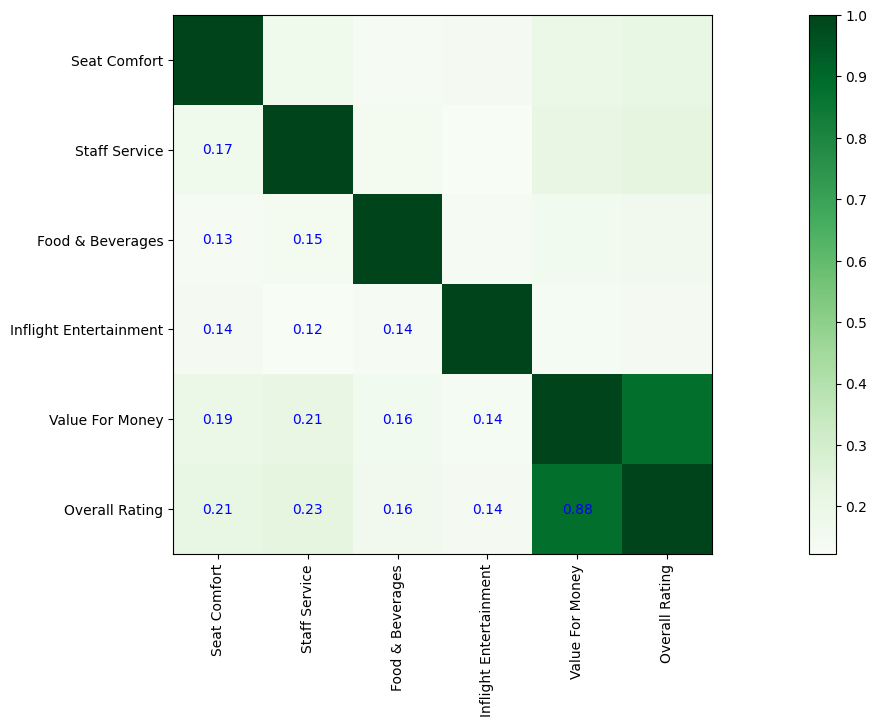

In [12]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(25, 7))
plt.imshow(corr, cmap='Greens')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='blue')

plt.show()

In [13]:
df['Type of Traveller'].value_counts(normalize=True)

Type of Traveller
Solo Leisure      0.399630
Couple Leisure    0.234444
Family Leisure    0.191481
Business          0.174444
Name: proportion, dtype: float64

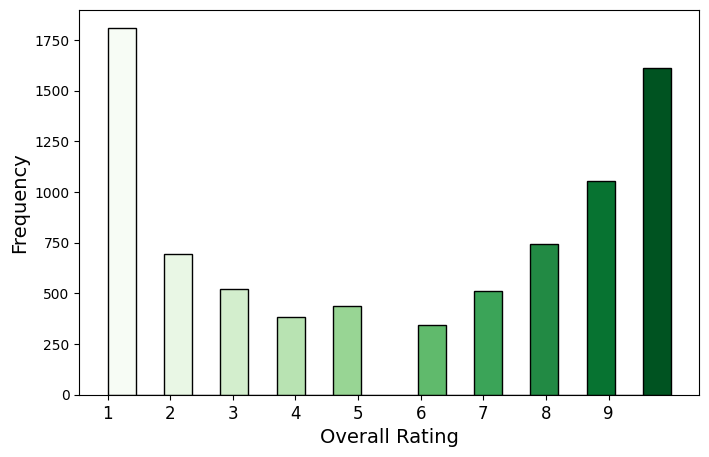

In [14]:
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df['Overall Rating'], bins=20, edgecolor='black')
cmap = plt.get_cmap('Greens')
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))

for patch, bin_value in zip(patches, bins):
    color = cmap(norm(bin_value))
    patch.set_facecolor(color)
    
plt.xticks(ticks=np.arange(1, df['Overall Rating'].max(), step=1), fontsize=12)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()

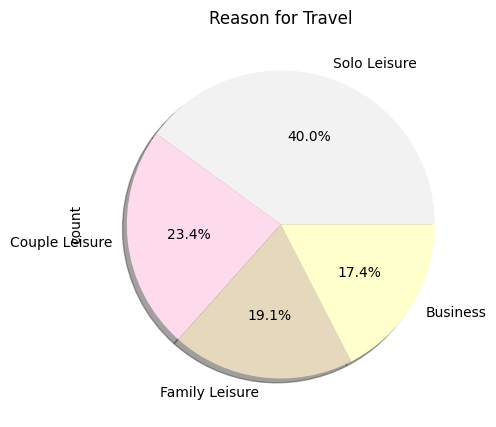

In [15]:
colors = plt.get_cmap('Pastel1_r').colors

df['Type of Traveller'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,5), title='Reason for Travel' , shadow=True , colors=colors)
plt.show()

In [16]:
df.Class.value_counts(normalize=True)

Class
Economy Class      0.679506
Business Class     0.259753
Premium Economy    0.045802
First Class        0.014938
Name: proportion, dtype: float64

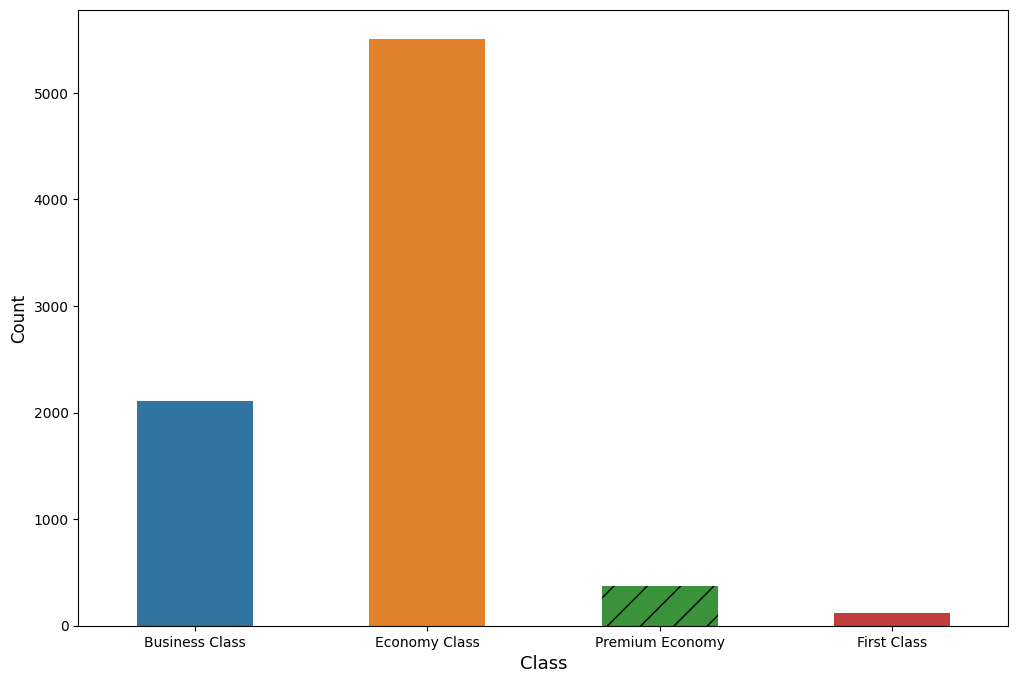

In [17]:
plt.figure(figsize=(12, 8))
ax =sns.countplot(x='Class', data=df, width=0.5)
plt.xlabel("Class", fontsize=13)
plt.ylabel("Count", fontsize=12)
middle_index = len(ax.patches) // 2
ax.patches[middle_index].set_hatch('/')  

plt.show()

**Observation**: Economy Class is the most affordable class

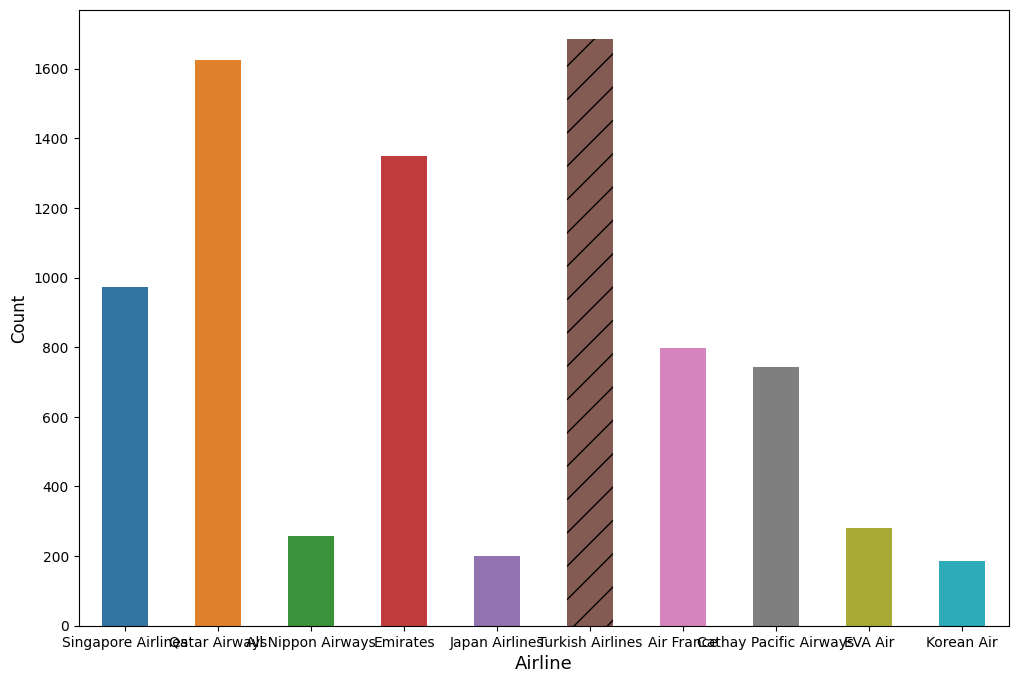

In [18]:
plt.figure(figsize=(12, 8))
ax =sns.countplot(x='Airline', data=df, width=0.5)
plt.xlabel("Airline", fontsize=13)
plt.ylabel("Count", fontsize=12)
middle_index = len(ax.patches) // 2
ax.patches[middle_index].set_hatch('/')  

plt.show()

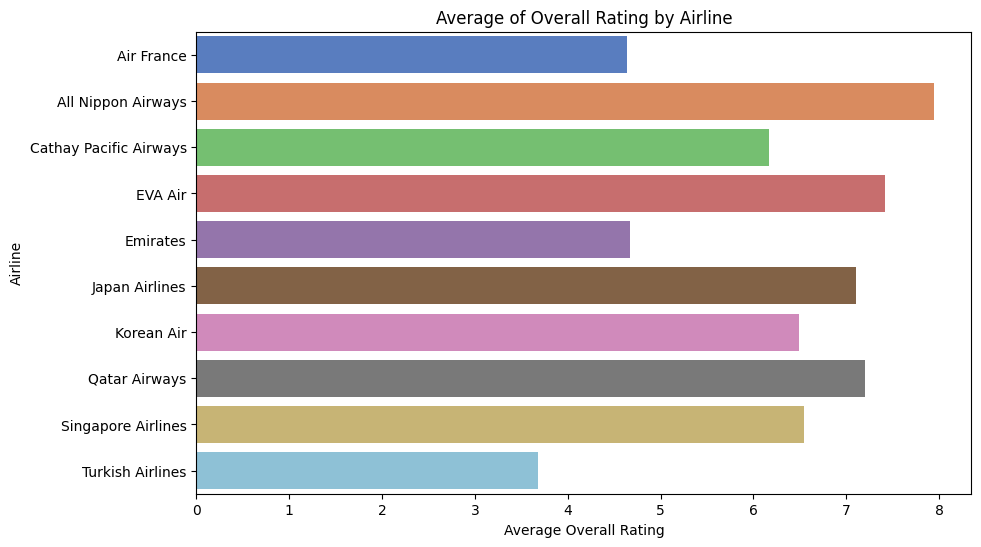

In [19]:
average_ratings = df.groupby('Airline')['Overall Rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall Rating', y='Airline', data=average_ratings, palette='muted')

plt.title('Average of Overall Rating by Airline')
plt.xlabel('Average Overall Rating')
plt.ylabel('Airline')
plt.show()

In [20]:
df_grouped = df.groupby(['Type of Traveller'])['Class'].value_counts(normalize=True).mul(100).round(2).unstack()
df_grouped

Class,Business Class,Economy Class,First Class,Premium Economy
Type of Traveller,,,,
Business,44.44,49.68,1.63,4.25
Couple Leisure,26.43,66.25,0.84,6.48
Family Leisure,13.93,82.08,0.71,3.29
Solo Leisure,23.42,70.16,2.19,4.23


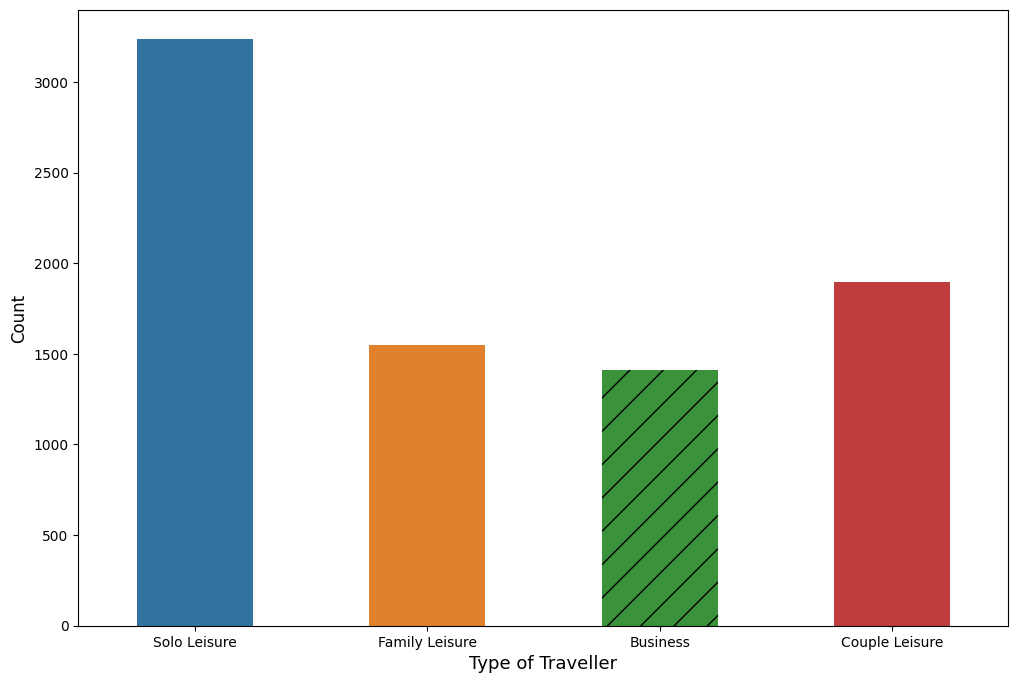

In [21]:
plt.figure(figsize=(12, 8))
ax =sns.countplot(x='Type of Traveller', data=df, width=0.5)
plt.xlabel("Type of Traveller", fontsize=13)
plt.ylabel("Count", fontsize=12)
middle_index = len(ax.patches) // 2
ax.patches[middle_index].set_hatch('/')  

plt.show()

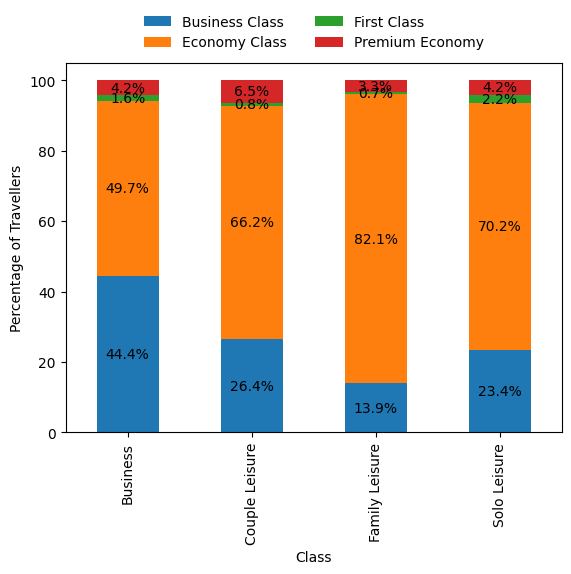

In [22]:
normalized_df = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

ax = normalized_df.plot.bar(stacked=True)
ax.set_xlabel('Class')
ax.set_ylabel('Percentage of Travellers')
ax.legend(bbox_to_anchor=(0.5, 1.02), ncol=2, 
          loc='lower center', 
          frameon=False, 
          borderaxespad=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.show()

**Observation**: More than 1,000 passengers have cited "Business" as their primary purpose for travel, nevertheless almost half of the travellers opt for Economy Class.

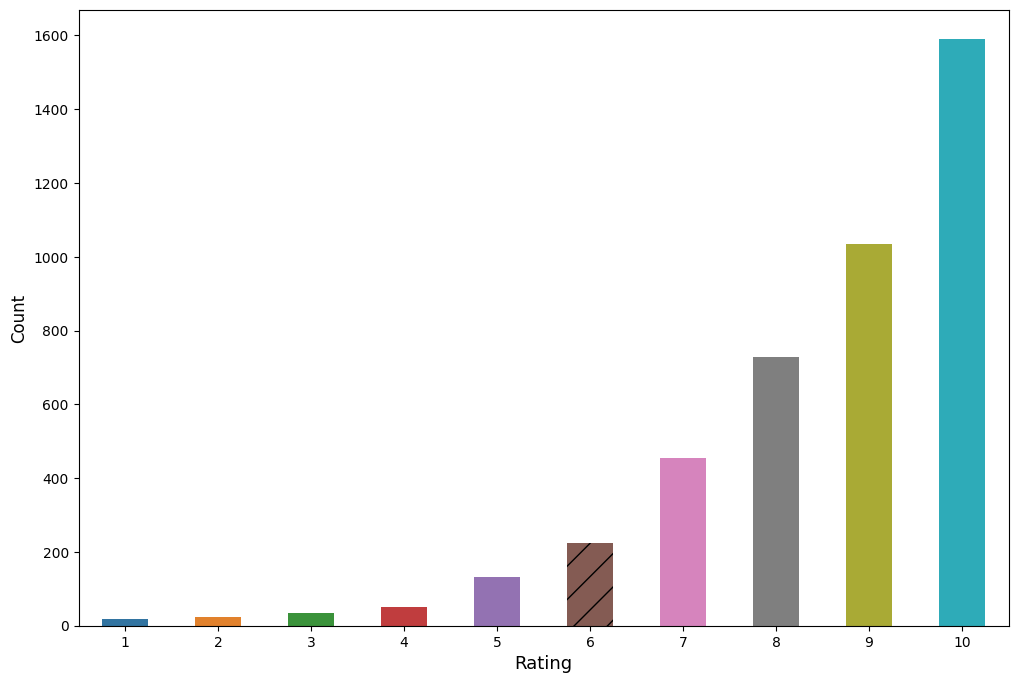

In [23]:
df_recommend = df[df['Recommended'] == 'yes']
plt.figure(figsize=(12, 8))
ax =sns.countplot(x='Overall Rating', data=df_recommend, width=0.5)
plt.xlabel("Rating", fontsize=13)
plt.ylabel("Count", fontsize=12)
middle_index = len(ax.patches) // 2
ax.patches[middle_index].set_hatch('/')  

plt.show()

**Observation**: overall satisfaction has a direct impact on recommendation.